## Importing the dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel (r'Real estate dataset.xlsx')

x1 = data.iloc[:315, 2].values.tolist() 
x1 = np.array(x1) 
x1 = np.reshape(x1,(315,1))

x2 = data.iloc[:315, 3].values.tolist() 
x2 = np.array(x2) 
x2 = np.reshape(x2,(315,1))

x3 = data.iloc[:315, 4].values.tolist() 
x3 = np.array(x3) 
x3 = np.reshape(x3,(315,1))

x4 = data.iloc[:315, 5].values.tolist() 
x4 = np.array(x4) 
x4 = np.reshape(x4,(315,1))

x5 = data.iloc[:315, 6].values.tolist() 
x5 = np.array(x5) 
x5 = np.reshape(x5,(315,1))



Y = data.iloc[:315, 7].values.tolist() 
Y = np.array(Y)
Y = np.reshape(Y,(315,1))


X = np.stack((x1,x2,x3,x4,x5),axis=1)
X = np.reshape(X,(315,5))

dataset = np.concatenate((X,Y),axis=1)
print("Data set: \n",dataset)
print(dataset.shape)
print("\n")

tx1 = data.iloc[315:, 2].values.tolist() 
tx1 = np.array(tx1) 
tx1 = np.reshape(tx1,(99,1))

tx2 = data.iloc[315:, 3].values.tolist() 
tx2 = np.array(tx2) 
tx2 = np.reshape(tx2,(99,1))

tx3 = data.iloc[315:, 4].values.tolist() 
tx3 = np.array(tx3) 
tx3 = np.reshape(tx3,(99,1))

tx4 = data.iloc[315:, 5].values.tolist() 
tx4 = np.array(tx4) 
tx4 = np.reshape(tx4,(99,1))

tx5 = data.iloc[315:, 6].values.tolist() 
tx5 = np.array(tx5) 
tx5 = np.reshape(tx5,(99,1))



tY = data.iloc[315:, 7].values.tolist() 
tY = np.array(tY)
tY = np.reshape(tY,(99,1))

tX = np.stack((tx1,tx2,tx3,tx4,tx5),axis=1)
tX = np.reshape(tX,(99,5))

testset = np.concatenate((tX,tY),axis=1)
print("Test set: \n",testset)
print("\n")









Data set: 
 [[ 32.       84.87882  10.       24.98298 121.54024  37.9    ]
 [ 19.5     306.5947    9.       24.98034 121.53951  42.2    ]
 [ 13.3     561.9845    5.       24.98746 121.54391  47.3    ]
 ...
 [ 35.4     318.5292    9.       24.97071 121.54069  78.     ]
 [  8.3     104.8101    5.       24.96674 121.54067  42.8    ]
 [  3.7     577.9615    6.       24.97201 121.54722  41.6    ]]
(315, 6)


Test set: 
 [[1.5600000e+01 1.7564110e+03 2.0000000e+00 2.4983200e+01 1.2151812e+02
  2.7300000e+01]
 [1.3300000e+01 2.5063100e+02 7.0000000e+00 2.4966060e+01 1.2154297e+02
  4.2000000e+01]
 [1.5600000e+01 7.5276690e+02 2.0000000e+00 2.4977950e+01 1.2153451e+02
  3.7500000e+01]
 [7.1000000e+00 3.7955750e+02 1.0000000e+01 2.4983430e+01 1.2153762e+02
  4.9800000e+01]
 [3.4600000e+01 2.7267830e+02 5.0000000e+00 2.4955620e+01 1.2153872e+02
  2.6900000e+01]
 [1.3500000e+01 4.1973490e+03 0.0000000e+00 2.4938850e+01 1.2150383e+02
  1.8600000e+01]
 [1.6900000e+01 9.6474960e+02 4.0000000e+00 2.4

## Principal Component Analysis

X scaled: 
 [[ 1.24661514 -0.78795207  2.0347486   1.13338921  0.43205279]
 [ 0.139915   -0.61221015  1.69107793  0.92020002  0.38433514]
 [-0.40900826 -0.40977677  0.31639523  1.49516481  0.67194839]
 ...
 [ 1.54763758 -0.60275033  1.69107793  0.14254399  0.46146779]
 [-0.85168832 -0.77215364  0.31639523 -0.17804733  0.46016045]
 [-1.25895397 -0.39711268  0.6600659   0.24752352  0.888312  ]]

 Covariance matrix: 
 [[ 1.00318471  0.03794294  0.01179374  0.03524289 -0.06915058]
 [ 0.03794294  1.00318471 -0.60891473 -0.59987613 -0.81756074]
 [ 0.01179374 -0.60891473  1.00318471  0.45356233  0.45274769]
 [ 0.03524289 -0.59987613  0.45356233  1.00318471  0.43166925]
 [-0.06915058 -0.81756074  0.45274769  0.43166925  1.00318471]]

 Percentages of contribution:  [53.95 20.3   2.9  11.93 10.92]


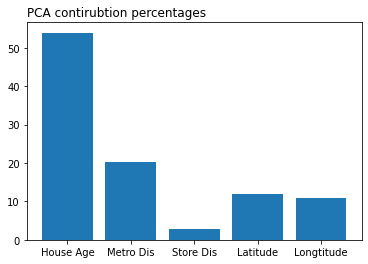

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
print("X scaled: \n",X_scaled)
cov_matrix = np.cov(X_scaled.T)
print("\n Covariance matrix: \n",cov_matrix)

values, vectors = np.linalg.eig(cov_matrix)
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

percentages = np.round(explained_variances,4)
percentages = percentages*100
print("\n Percentages of contribution: ", percentages)

lb = np.array(["House Age", "Metro Dis", "Store Dis", "Latitude", "Longtitude"])

plt.bar(lb,percentages)
plt.title("PCA contirubtion percentages", loc = 'left')
plt.show()

## Sketching an approximate plot of a cubic function

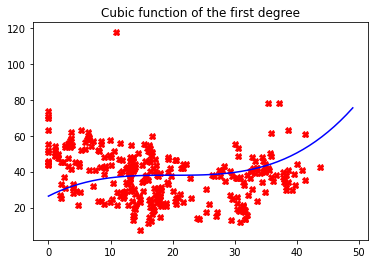

In [ ]:
plt.plot(x1, Y, 'X',color="red")


a=[]
b=[]
for xx in range(0,50,1):
    yy= 0.0015*(xx-20)**3 + 0.001*(xx-20)**2 + 0.001*(xx-20) + 38
    a.append(xx)
    b.append(yy)

plt.plot(a,b,color="blue")
plt.title("Cubic function of the first degree")
plt.show()

## Learning - Step 1

In [ ]:
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X)
X_tr = np.reshape(X_norm,(315,5))

X1 = np.array(X_tr, dtype=np.float64)
Y = np.array(Y, dtype=np.float64)
X2 = np.power(X1,2)
X3 = np.power(X1,3)

tX_norm = StandardScaler().fit_transform(tX)
tXn = np.reshape(tX_norm,(99,5))

tX1 = np.array(tXn, dtype=np.float64)
tY = np.array(tY, dtype=np.float64)
tX2 = np.power(tX1,2)
tX3 = np.power(tX1,3)

z = np.zeros((X.shape[1],1))
a = np.zeros((X.shape[1],1))
b = np.zeros((X.shape[1],1))
c = 0


def error(res,YY):
    mse = np.mean( np.abs((res-YY)) )
    return mse

###################
n_iter = 18000
lr = 0.01
###################

track = []
lrs = []
for iii in range(n_iter):
    ff = np.dot(X3,z) + np.dot(X2,a) + np.dot(X1,b) + c
    cost = error(ff,Y)
    print(cost)
    track.append(cost)
    if(iii<501):
        if ((iii%100)==0):
            lr = lr/10
    elif ((iii>500) and (iii<2600)):
        if ((iii%100)==0):
            lr = lr*2
    elif ( (iii>2599) and (iii<5001) ):
        if ((iii%100)==0):
            lr = lr*0.9
    elif ( (iii>5000) and (iii<5801) ):
        if ((iii%100)==0):
            lr = lr*1.45
    elif ( (iii>5800) and (iii<9001) ):
        lr = lr*0.995
    elif ( (iii>9000) and (iii<12040) ):
        if ( (iii%100)==0 ):
            lr = lr*1.7
    elif (iii>12039):
        if ( (iii%100)==0 ):
            lr = lr*0.7

    dz = (1 / X1.shape[0]) * (2 * np.dot(X3.T, (ff - Y)))
    da = (1 / X1.shape[0]) * (2 * np.dot(X2.T, (ff - Y)))
    db = (1 / X1.shape[0]) * (2 * np.dot(X1.T, (ff - Y)))
    dc = (1 / X1.shape[0]) * (2 * np.sum(ff - Y))
    
    z = z - lr*dz
    a = a - lr*da
    b = b - lr*db
    c = c - lr*dc    
    lrs.append(lr)
    print("Iter: ",iii," LR = ",lr)
    #print(z.T)
    #print(a.T)
    #print(b.T)
    #print("c = ",c)





Выходные данные были обрезаны до нескольких последних строк (5000).
5.023673610576911
Iter:  15500  LR =  4.935874347218523e-08
5.023673610571197
Iter:  15501  LR =  4.935874347218523e-08
5.023673610565481
Iter:  15502  LR =  4.935874347218523e-08
5.023673610559767
Iter:  15503  LR =  4.935874347218523e-08
5.023673610554052
Iter:  15504  LR =  4.935874347218523e-08
5.023673610548337
Iter:  15505  LR =  4.935874347218523e-08
5.023673610542622
Iter:  15506  LR =  4.935874347218523e-08
5.023673610536907
Iter:  15507  LR =  4.935874347218523e-08
5.023673610531193
Iter:  15508  LR =  4.935874347218523e-08
5.023673610525478
Iter:  15509  LR =  4.935874347218523e-08
5.023673610519764
Iter:  15510  LR =  4.935874347218523e-08
5.023673610514049
Iter:  15511  LR =  4.935874347218523e-08
5.023673610508334
Iter:  15512  LR =  4.935874347218523e-08
5.02367361050262
Iter:  15513  LR =  4.935874347218523e-08
5.023673610496905
Iter:  15514  LR =  4.935874347218523e-08
5.02367361049119
Iter:  15515  LR

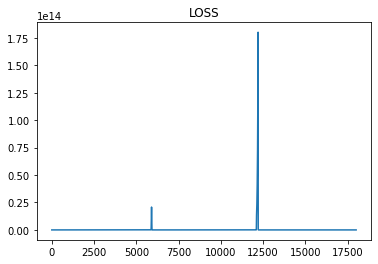

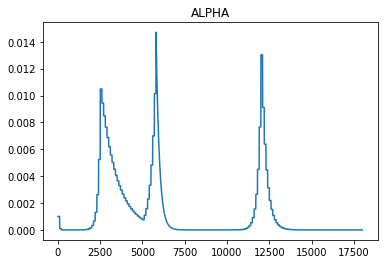

z =  [[ 0.30145971 -1.40293459  0.8119684  -0.56941017 -0.03532627]]
a =  [[ 1.74078489  7.65278906 -0.72864255  0.7142801   1.02331425]]
b =  [[ -4.44527654 -13.53480537  -0.90456766   5.93449618   0.55873683]]
c =  29.8837701656052
Current Mean Square Error is: 
 5.02367360867229


In [ ]:
import matplotlib.pyplot as plt
plt.plot(track)
plt.title("LOSS")
plt.show()

import matplotlib.pyplot as plt
plt.plot(lrs)
plt.title("ALPHA")
plt.show()


len(track)

#from math import *
print("z = ", z.T)
print("a = ", a.T)
print("b = ", b.T)
print("c = ", c)
print("Current Mean Square Error is: \n",track[-1])

## Learning - Step 2

In [ ]:
zn = z
an = a
bn = b
cn = c

###################
n_itern = 36000
lrn = 0.001
###################
costn = 0.00001
cpred = 5
trackn = []
lrsn = []
for iiii in range(n_itern):
    ffn = np.dot(X3,zn) + np.dot(X2,an) + np.dot(X1,bn) + cn
    costn = error(ffn,Y)
    print(costn)
    trackn.append(costn)

    if ((costn/cpred) > 10):
        lrn = lrn/10000

    cpred = costn
    dzn = (1 / X1.shape[0]) * (2 * np.dot(X3.T, (ffn - Y)))
    dan = (1 / X1.shape[0]) * (2 * np.dot(X2.T, (ffn - Y)))
    dbn = (1 / X1.shape[0]) * (2 * np.dot(X1.T, (ffn - Y)))
    dcn = (1 / X1.shape[0]) * (2 * np.sum(ffn - Y))
    
    zn = zn - lrn*dzn
    an = an - lrn*dan
    bn = bn - lrn*dbn
    cn = cn - lrn*dcn   
    lrsn.append(lrn)
    
    print("Iter ",iiii, " LR = ", lrn)

Выходные данные были обрезаны до нескольких последних строк (5000).
5.018229224012264
Iter  33500  LR =  0.001
5.018229094103664
Iter  33501  LR =  0.001
5.018228964195444
Iter  33502  LR =  0.001
5.018228834287602
Iter  33503  LR =  0.001
5.018228704380139
Iter  33504  LR =  0.001
5.018228574473055
Iter  33505  LR =  0.001
5.0182284445663505
Iter  33506  LR =  0.001
5.018228314660025
Iter  33507  LR =  0.001
5.018228184754079
Iter  33508  LR =  0.001
5.018228054848514
Iter  33509  LR =  0.001
5.018227924943327
Iter  33510  LR =  0.001
5.01822779503852
Iter  33511  LR =  0.001
5.018227665134095
Iter  33512  LR =  0.001
5.018227535230047
Iter  33513  LR =  0.001
5.018227405326382
Iter  33514  LR =  0.001
5.018227275423097
Iter  33515  LR =  0.001
5.018227145520192
Iter  33516  LR =  0.001
5.018227015617667
Iter  33517  LR =  0.001
5.018226885715524
Iter  33518  LR =  0.001
5.018226755813762
Iter  33519  LR =  0.001
5.018226625912381
Iter  33520  LR =  0.001
5.018226496011381
Iter  33521

In [ ]:
print("z =", zn.T)
print("a = ", an.T)
print("b = ", bn.T)
print("c = ", cn)
print("Current MAS = ", trackn[-1])

z = [[ 0.27157307 -1.45405054  1.03809763 -0.57269687 -0.1423577 ]]
a =  [[ 1.68991207  8.56318055 -0.93839857  0.07048666 -0.72684728]]
b =  [[ -4.45656497 -11.13932026  -1.31710835   6.05483443   1.56137558]]
c =  31.60670052679083
Current MAS =  5.017977786212875


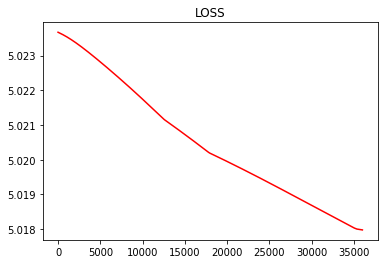

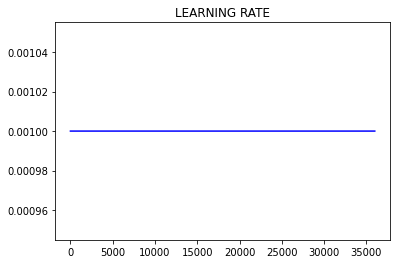

In [ ]:
plt.plot(trackn,color="red")
plt.title("LOSS")
plt.show()

plt.plot(lrsn, color="blue")
plt.title("LEARNING RATE")
plt.show()